---
## 모델 크기 조절
___
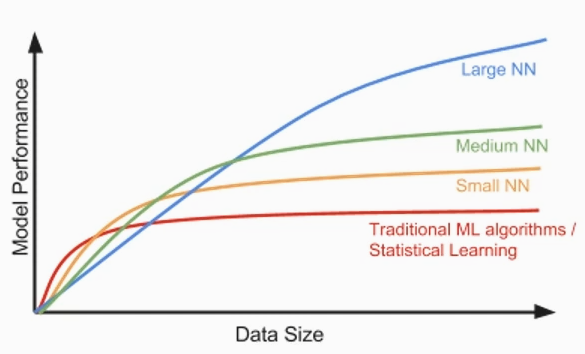  
레이어의 유닛수를 증가/감소시켜 모델의 전체 파라미터 수를 증가/감소  
레이어 수를 증가시켜 더 깊은 신경망으로 모델 크기를 증가  
데이터의 규모가 클수록 크고 깊은 모델에서 좋은 성능을 보여줌  
데이터 규모에 비해 모델이 너무 크면 과대적합이 발생할 수 있음  

### 데이터 로드 및 전처리

In [1]:
from keras.datasets import imdb
import numpy as np

# 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
def one_hot_encoding(data, dim=10000): 
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성 및 컴파일

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


### 모델 학습


In [3]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 6s 96ms/step - loss: 0.4268 - accuracy: 0.7998 - val_loss: 0.2857 - val_accuracy: 0.8861
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 0.2399 - accuracy: 0.9064 - val_loss: 0.3133 - val_accuracy: 0.8720
Epoch 3/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1662 - accuracy: 0.9361 - val_loss: 0.3030 - val_accuracy: 0.8824
Epoch 4/30
49/49 [==============================] - 1s 20ms/step - loss: 0.1160 - accuracy: 0.9547 - val_loss: 0.3387 - val_accuracy: 0.8760
Epoch 5/30
49/49 [==============================] - 1s 20ms/step - loss: 0.0755 - accuracy: 0.9731 - val_loss: 0.3936 - val_accuracy: 0.8761
Epoch 6/30
49/49 [==============================] - 1s 21ms/step - loss: 0.0515 - accuracy: 0.9852 - val_loss: 0.4529 - val_accuracy: 0.8739
Epoch 7/30
49/49 [==============================] - 1s 20ms/step - loss: 0.0382 - accuracy: 0.9904 - val_loss: 0.5250 - val_accuracy: 0.8729
Epoch 8/30
49

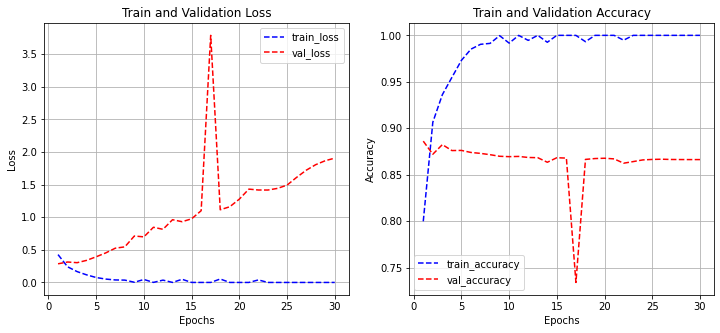

In [4]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 딥러닝 모델이 과대적합된 상태인 것을 알 수 있다.  

---
### 모델 크기 증가

In [5]:
# Dense 레이어의 유닛수를 128에서 2048로 크게 증가시켜서 모델의 전체 파라미터 수가 24,680,449개
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 2048)              20482048  
_________________________________________________________________
hidden3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
output3 (Dense)              (None, 1)                 2049      
Total params: 24,680,449
Trainable params: 24,680,449
Non-trainable params: 0
_________________________________________________________________


In [6]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 91ms/step - loss: 0.6035 - accuracy: 0.7839 - val_loss: 0.2853 - val_accuracy: 0.8868
Epoch 2/30
49/49 [==============================] - 2s 37ms/step - loss: 0.2205 - accuracy: 0.9146 - val_loss: 0.3824 - val_accuracy: 0.8629
Epoch 3/30
49/49 [==============================] - 2s 37ms/step - loss: 0.1115 - accuracy: 0.9618 - val_loss: 0.3923 - val_accuracy: 0.8706
Epoch 4/30
49/49 [==============================] - 2s 36ms/step - loss: 0.0650 - accuracy: 0.9822 - val_loss: 3.6053 - val_accuracy: 0.6206
Epoch 5/30
49/49 [==============================] - 2s 37ms/step - loss: 0.0461 - accuracy: 0.9918 - val_loss: 0.5426 - val_accuracy: 0.8840
Epoch 6/30
49/49 [==============================] - 2s 37ms/step - loss: 0.1387 - accuracy: 0.9853 - val_loss: 0.5693 - val_accuracy: 0.8846
Epoch 7/30
49/49 [==============================] - 2s 37ms/step - loss: 1.2765e-04 - accuracy: 1.0000 - val_loss: 0.7328 - val_accuracy: 0.8784
Epoch 8/3

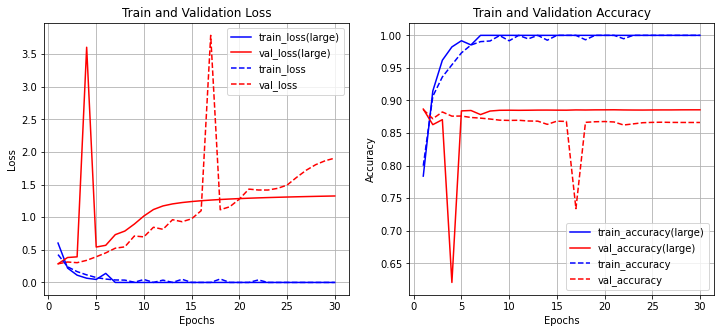

In [7]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 
모델의 크기가 큰(파라미터 수가 많은) 신경망일수록 
- 빠르게 훈련 데이터 모델링이 가능  
- 학습 손실이 낮아진다
- 그러나 모델이 과대적합에는 더욱 민감해진다 : 학습-검증 데이터 손실

---
### 모델 크기 감소

In [8]:
# Dense 레이어의 유닛수를 128대신 16으로 모델의 크기를 줄여서 전체 파라미터의 수가 160,305개로 줄어들게 됩니다.
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 16)                160016    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 0.4523 - accuracy: 0.8320 - val_loss: 0.3329 - val_accuracy: 0.8820
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2569 - accuracy: 0.9092 - val_loss: 0.2838 - val_accuracy: 0.8900
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1993 - accuracy: 0.9290 - val_loss: 0.2927 - val_accuracy: 0.8833
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1648 - accuracy: 0.9421 - val_loss: 0.3049 - val_accuracy: 0.8801
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1451 - accuracy: 0.9492 - val_loss: 0.3245 - val_accuracy: 0.8762
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.1277 - accuracy: 0.9553 - val_loss: 0.3334 - val_accuracy: 0.8775
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1133 - accuracy: 0.9604 - val_loss: 0.3576 - val_accuracy: 0.8745
Epoch 8/30
49

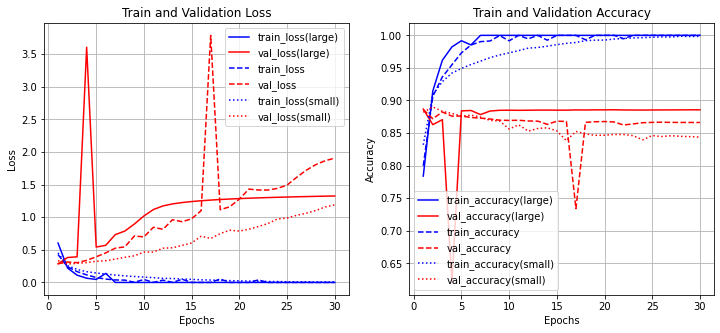

In [10]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감
- 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절 해야 된다

그렇다면 어느정도 파라미터가 적절할까? 

---
### Test

In [11]:
# [play ground]
# 원하는 분은 Dense층을 늘리거나 줄이는 등 모델의 구조 역시 변경해보시기 바랍니다.

your_model = models.Sequential()
your_model.add(layers.Dense(32, activation='relu', input_shape=(10000, ), name='input2'))
your_model.add(layers.Dense(64, activation='relu', name='hidden2'))
your_model.add(layers.Dense(128, activation='relu', name='hidden2_1'))
your_model.add(layers.Dense(256, activation='relu', name='hidden2_2'))
your_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
your_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
your_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 32)                320032    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                2112      
_________________________________________________________________
hidden2_1 (Dense)            (None, 128)               8320      
_________________________________________________________________
hidden2_2 (Dense)            (None, 256)               33024     
_________________________________________________________________
output2 (Dense)              (None, 1)                 257       
Total params: 363,745
Trainable params: 363,745
Non-trainable params: 0
_________________________________________________________________


In [12]:
your_model_history = your_model.fit(x_train, y_train, epochs=30, batch_size=512,  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 73ms/step - loss: 0.4245 - accuracy: 0.7975 - val_loss: 0.3374 - val_accuracy: 0.8644
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2306 - accuracy: 0.9111 - val_loss: 0.2919 - val_accuracy: 0.8822
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1741 - accuracy: 0.9338 - val_loss: 0.3271 - val_accuracy: 0.8781
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1306 - accuracy: 0.9504 - val_loss: 0.3551 - val_accuracy: 0.8772
Epoch 5/30
49/49 [==============================] - 1s 20ms/step - loss: 0.0965 - accuracy: 0.9651 - val_loss: 0.4268 - val_accuracy: 0.8707
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 0.0867 - accuracy: 0.9726 - val_loss: 0.4396 - val_accuracy: 0.8692
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.0512 - accuracy: 0.9861 - val_loss: 0.5782 - val_accuracy: 0.8690
Epoch 8/30
49

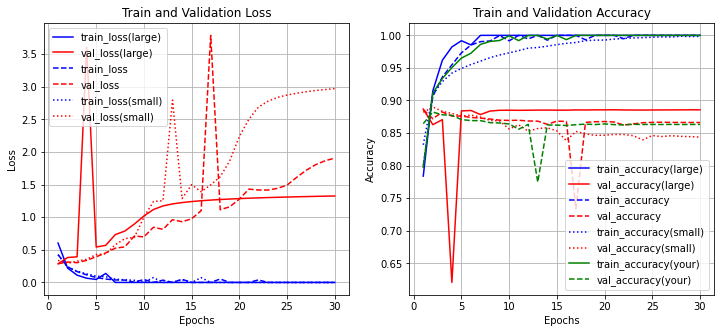

In [13]:
your_history_dict = your_model_history.history

your_loss = your_history_dict['loss']
your_val_loss = your_history_dict['val_loss']
epochs = range(1, len(your_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, your_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, your_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

your_accuracy = your_history_dict['accuracy']
your_val_accuracy = your_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.plot(epochs, your_accuracy, 'g-', label='train_accuracy(your)')
ax2.plot(epochs, your_val_accuracy, 'g--', label='val_accuracy(your)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

--
## 규제(Regularization)
---
가중치의 파라미터 값이 커서 **과대적합**이 발생하는 경우, **큰 가중치 값에는 큰 규제**를 가하는 방법  
규제를 통해 가중치의 절댓값을 가능한 작게 만들어서 가중치의 모든 원소를 0에 가깝게 하여  
모든 특성이 출력에 주는 영향을 최소한으로 만드는 것 : **기울기를 작게 만드는 과정**  
규제를 통해 **가중치의 분포가 더 균일하게** 되고, 복잡한 네트워크일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 함  
규제가 모델이 과대적합 되지 않도록 강제로 제한하는 역할을 하므로 적절한 규제값을 찾는 것이 중요  
모델의 손실함수에서 큰 가중치에 비용을 추가하는 형태로 규제를 적용할 수 있으며 대표적인 방법으로 **L1규제**와 **L2규제**가 있다
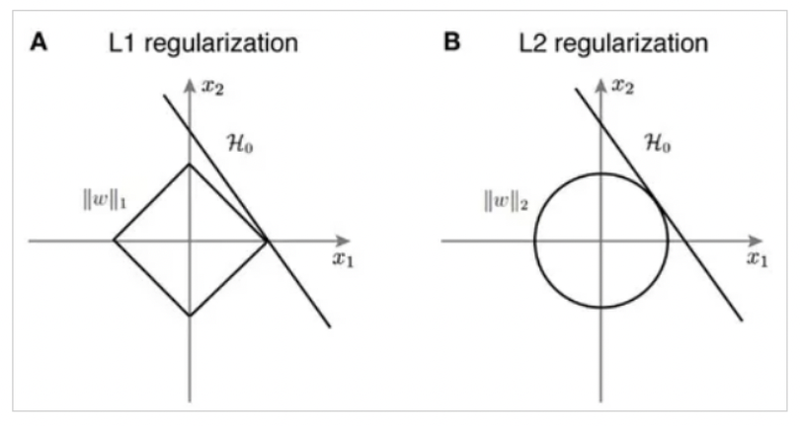  

---
### L1 규제
가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가하는 방법  
**가중치의 절댓값(L1 norm)**  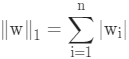  

전체 비용은 기존 손실함수 L 에서 α를 곱한 L1 규제를 적용하여 계산  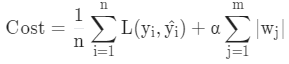  

α값을 이용하여 사용자가 하이퍼파라메터처럼 규제의 조절이 가능
α값을 증가시키면 규제가 강해져서 가중치 절댓값의 합을 줄이도록 학습 
- 가중치가 0인 중요하지 않은 것들을 제외되어 일반화에 적합
α값을 감소시키면 규제가 약해져서 가중치 값이 증가 : 과대적합이 발생할 수 있음




In [14]:
from tensorflow.keras import models, layers

l1_model =  models.Sequential()
'''
케라스 L1 규제 사용
- kernel_regularizer : l1 지정
- bias_regularizer: 편향 정규화
- activity_regularizer : 출력값 정규화
'''
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 3.7385 - accuracy: 0.5281 - val_loss: 1.9457 - val_accuracy: 0.6492
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 1.8781 - accuracy: 0.6393 - val_loss: 1.8081 - val_accuracy: 0.6646
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 1.7620 - accuracy: 0.7164 - val_loss: 1.7248 - val_accuracy: 0.7088
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 1.6729 - accuracy: 0.7385 - val_loss: 1.6208 - val_accuracy: 0.7568
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5949 - accuracy: 0.7583 - val_loss: 1.5702 - val_accuracy: 0.7549
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5259 - accuracy: 0.7720 - val_loss: 1.4835 - val_accuracy: 0.7766
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 1.4662 - accuracy: 0.7845 - val_loss: 1.4540 - val_accuracy: 0.7831
Epoch 8/30
49

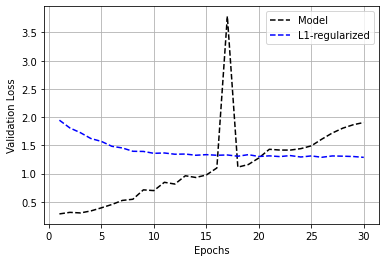

In [16]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### L2 규제
가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법  
**가중치의 제곱(L2 norm)**  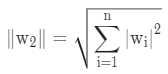  

전체 비용은 기존 손실함수 L 에서 λ를 곱한 L2 규제를 적용하여 계산  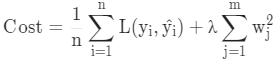  

L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값을 더하여 과대적합을 방지  
λ값이 크면 가중치가 커지고, 작으면 규제가 적어지게 된다
L2 규제는 L1 보다 더 Robust한 모델을 생성하므로 많이 사용되는 방법 중 하나


In [17]:
l2_model =  models.Sequential()

# 케라스 L2 규제 사용 : kernel_regularizer l2 지정
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 0.7063 - accuracy: 0.8070 - val_loss: 0.6218 - val_accuracy: 0.8212
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.5259 - accuracy: 0.8801 - val_loss: 0.5126 - val_accuracy: 0.8790
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4849 - accuracy: 0.8861 - val_loss: 0.4886 - val_accuracy: 0.8795
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4601 - accuracy: 0.8889 - val_loss: 0.4786 - val_accuracy: 0.8751
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4434 - accuracy: 0.8916 - val_loss: 0.4976 - val_accuracy: 0.8560
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4313 - accuracy: 0.8922 - val_loss: 0.4669 - val_accuracy: 0.8696
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.4272 - accuracy: 0.8931 - val_loss: 0.5048 - val_accuracy: 0.8463
Epoch 8/30
49

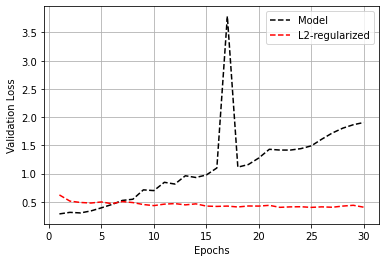

In [19]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### L1 L2 규제

In [20]:
l1_l2_model =  models.Sequential()

# 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 3.9122 - accuracy: 0.5948 - val_loss: 2.0549 - val_accuracy: 0.7267
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 1.9699 - accuracy: 0.6848 - val_loss: 1.8882 - val_accuracy: 0.7098
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 1.8350 - accuracy: 0.7102 - val_loss: 1.7789 - val_accuracy: 0.7344
Epoch 4/30
49/49 [==============================] - 1s 19ms/step - loss: 1.7219 - accuracy: 0.7395 - val_loss: 1.6688 - val_accuracy: 0.7309
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 1.6274 - accuracy: 0.7528 - val_loss: 1.5876 - val_accuracy: 0.7659
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 1.5466 - accuracy: 0.7689 - val_loss: 1.5075 - val_accuracy: 0.7747
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 1.4827 - accuracy: 0.7803 - val_loss: 1.4599 - val_accuracy: 0.7873
Epoch 8/30
49

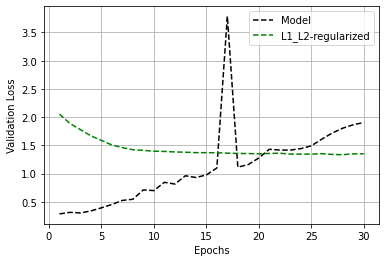

In [22]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

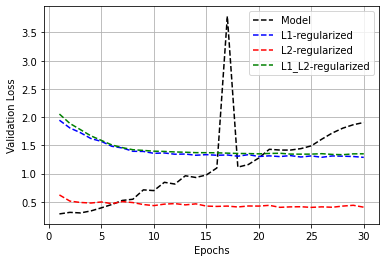

In [23]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있다  
전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있다  
물론 어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요  

### Test

In [26]:
# [play ground]
# L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.

your_model =  models.Sequential()
your_model.add(layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.02), activation='relu', input_shape=(10000, )))
your_model.add(layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.02), activation='relu'))
your_model.add(layers.Dense(1, activation='sigmoid'))
your_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
your_model_hist = your_model.fit(x_train, y_train,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 70ms/step - loss: 0.8962 - accuracy: 0.8055 - val_loss: 0.7273 - val_accuracy: 0.8699
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.6761 - accuracy: 0.8709 - val_loss: 0.6423 - val_accuracy: 0.8691
Epoch 3/30
49/49 [==============================] - 1s 17ms/step - loss: 0.6064 - accuracy: 0.8726 - val_loss: 0.5889 - val_accuracy: 0.8690
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.5576 - accuracy: 0.8748 - val_loss: 0.5430 - val_accuracy: 0.8748
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.5190 - accuracy: 0.8792 - val_loss: 0.5401 - val_accuracy: 0.8556
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4981 - accuracy: 0.8783 - val_loss: 0.4999 - val_accuracy: 0.8715
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4804 - accuracy: 0.8783 - val_loss: 0.4845 - val_accuracy: 0.8745
Epoch 8/30
49

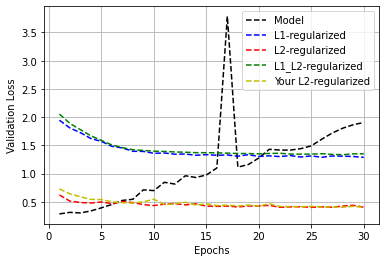

In [28]:
your_val_loss = your_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

---
## 드롭아웃(Dropout)
---
딥러닝 모델의 과대적합을 방지하기 위한 규제 기법 - 쉽고 효과적이며 간편하여 널리 사용  
**모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용하는 방법**  
학습 진행 중 무작위로 레이어의 일부 특성(노드)을 제외하는 형태로 동작  
일반적으로 20~50% 비율로 지정  
테스트 단계에서는 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여주게 된다  
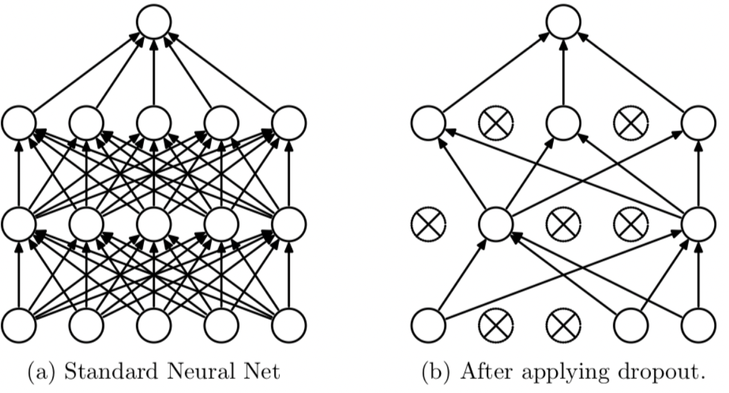  

### 드롭아웃 20%

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 69ms/step - loss: 0.5186 - accuracy: 0.7666 - val_loss: 0.3621 - val_accuracy: 0.8764
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 0.3277 - accuracy: 0.8832 - val_loss: 0.2953 - val_accuracy: 0.8885
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2505 - accuracy: 0.9122 - val_loss: 0.2819 - val_accuracy: 0.8878
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2040 - accuracy: 0.9304 - val_loss: 0.2865 - val_accuracy: 0.8842
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 0.1710 - accuracy: 0.9420 - val_loss: 0.3011 - val_accuracy: 0.8810
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1457 - accuracy: 0.9507 - val_loss: 0.3457 - val_accuracy: 0.8750
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1216 - accuracy: 0.9598 - val_loss: 0.3845 - val_accuracy: 0.8733
Epoch 8/30
49

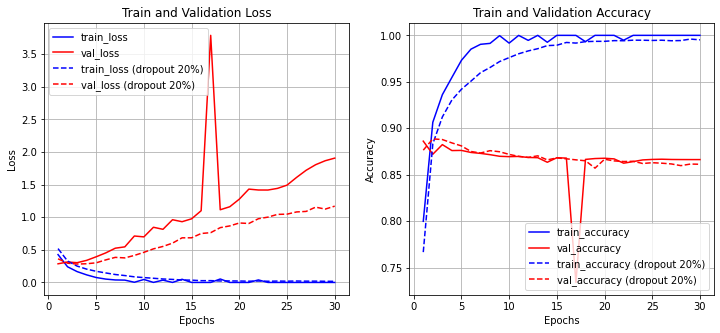

In [31]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 드롭아웃 (50%)

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [33]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 69ms/step - loss: 0.6071 - accuracy: 0.6747 - val_loss: 0.4835 - val_accuracy: 0.8603
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4620 - accuracy: 0.8230 - val_loss: 0.3662 - val_accuracy: 0.8757
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.3751 - accuracy: 0.8718 - val_loss: 0.3258 - val_accuracy: 0.8832
Epoch 4/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3155 - accuracy: 0.8956 - val_loss: 0.3005 - val_accuracy: 0.8858
Epoch 5/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2742 - accuracy: 0.9122 - val_loss: 0.2931 - val_accuracy: 0.8839
Epoch 6/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2468 - accuracy: 0.9199 - val_loss: 0.3026 - val_accuracy: 0.8792
Epoch 7/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2183 - accuracy: 0.9281 - val_loss: 0.3181 - val_accuracy: 0.8818
Epoch 8/30
49

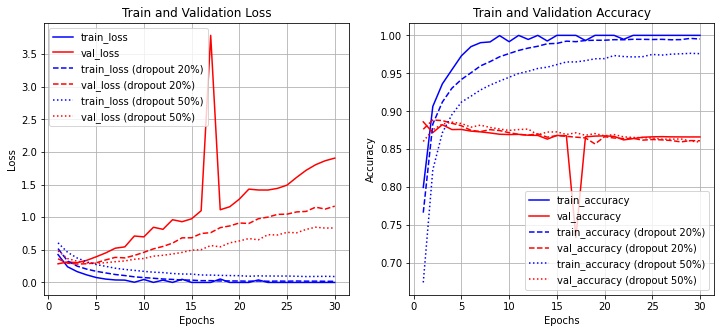

In [34]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()